<a href="https://colab.research.google.com/github/luanwma/IA_Projeto_Final/blob/main/C%C3%B3pia_de_ProjetoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Luan William Marques Alvares
## Mateus Luz Francischini Bonardi
## Rafael Duarte Daltio

# Tratamento e pré-processamento dos dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('drive/MyDrive/Colab Notebooks/projetoFinal/Titanic-Dataset.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df=df.drop(columns=['PassengerId','Name','Ticket'], axis=1)

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
df2 = df.drop('Cabin', axis=1)
df2 = pd.get_dummies(data = df2, columns=['Embarked'])
df2 = pd.get_dummies(data=df2, columns=['Pclass'])
df2



,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.000000,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.000000,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.000000,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.000000,1,0,53.1000,0,0,1,1,0,0
4,0,1,35.000000,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,13.0000,0,0,1,0,1,0
887,1,0,19.000000,0,0,30.0000,0,0,1,1,0,0
888,0,0,29.699118,1,2,23.4500,0,0,1,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0,1,0,0


In [ ]:
df = pd.get_dummies(data=df, columns=['Cabin'])
df = pd.get_dummies(data=df, columns=['Embarked'])
df = pd.get_dummies(data=df, columns=['Pclass'])
df

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,...,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.000000,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,38.000000,1,0,71.2833,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,26.000000,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,35.000000,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,1,35.000000,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,13.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
887,1,0,19.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
888,0,0,29.699118,1,2,23.4500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
889,1,1,26.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


NORMALIZACAO

In [ ]:
std=StandardScaler()
columns = ['Age','Fare']
scaled = std.fit_transform(df[['Age','Fare']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)
df2=df2.drop(columns=columns,axis=1)

In [ ]:
df=df.merge(scaled, left_index=True, right_index=True, how = "right")
df2=df2.merge(scaled, left_index=True, right_index=True, how = "right")
df2

,Survived,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age,Fare
0,0,1,1,0,0,0,1,0,0,1,-0.592481,-0.502445
1,1,0,1,0,1,0,0,1,0,0,0.638789,0.786845
2,1,0,0,0,0,0,1,0,0,1,-0.284663,-0.488854
3,1,0,1,0,0,0,1,1,0,0,0.407926,0.420730
4,0,1,0,0,0,0,1,0,0,1,0.407926,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,0,1,0,1,0,-0.207709,-0.386671
887,1,0,0,0,0,0,1,1,0,0,-0.823344,-0.044381
888,0,0,1,2,0,0,1,0,0,1,0.000000,-0.176263
889,1,1,0,0,1,0,0,1,0,0,-0.284663,-0.044381


## Algoritmos de Classificação

Separação de treino e teste em 70% e 30%

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_no_cabin = df2.drop('Survived', axis=1)
y_no_cabin = df2['Survived']
y_no_cabin


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_no_cabin, X_test_no_cabin, y_train_no_cabin, y_test_no_cabin = train_test_split(X_no_cabin, y_no_cabin, test_size=0.3)

# Balanceamento de Classes

In [ ]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
x_train_oversampled_no_cabin, y_train_oversampled_no_cabin = sm.fit_resample(X_train_no_cabin, y_train_no_cabin)

In [ ]:
print(x_train_oversampled_no_cabin.shape)
print(x_train_oversampled.shape)
print(X_train.shape)

(768, 11)
(794, 158)
(623, 158)


# Técnicas de ajuste de hiperparâmetros para KNN

In [ ]:
knn = KNeighborsClassifier()

param_grid_KNN = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}

## GridSearchCV

In [ ]:
g_search = GridSearchCV(estimator = knn, param_grid = param_grid_KNN,
                        cv = 10, return_train_score=True)

In [ ]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [ ]:
print(np.unique(y_train_oversampled, return_counts=True))

(array([0, 1]), array([397, 397]))


In [ ]:
g_search.fit(x_train_oversampled, y_train_oversampled);
print(g_search.best_params_)

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [ ]:
print(g_search.best_score_)

0.8363291139240505



 ## RandomizedSearchCV

In [ ]:
r_search = RandomizedSearchCV(estimator = knn, param_distributions = param_grid_KNN,
                        n_iter= 10, cv = 10, return_train_score=True)

In [ ]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [ ]:
print(np.unique(y_train_oversampled, return_counts=True))

(array([0, 1]), array([397, 397]))


In [ ]:
r_search.fit(x_train_oversampled, y_train_oversampled);
print(r_search.best_params_)

{'weights': 'uniform', 'p': 1, 'n_neighbors': 7}


In [ ]:
print(r_search.best_score_)

0.8413765822784811


# Técnicas de ajuste de hiperparâmetros para Random Forest

In [ ]:
forest = RandomForestClassifier()

param_grid_RF = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features':['sqrt','log2'],
              'n_estimators': [10, 20, 30, 60]}

## GridSearchCV

In [ ]:
g_search = GridSearchCV(estimator = forest, param_grid = param_grid_RF,
                        cv = 10, return_train_score=True)

In [ ]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [ ]:
print(np.unique(y_train_oversampled, return_counts=True))

(array([0, 1]), array([397, 397]))


In [ ]:
g_search.fit(x_train_oversampled, y_train_oversampled);
print(g_search.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 60}


In [ ]:
print(g_search.best_score_)

0.8577056962025316



 ## RandomizedSearchCV

In [ ]:
r_search = RandomizedSearchCV(estimator = forest, param_distributions = param_grid_RF,
                        n_iter= 10, cv = 10, return_train_score=True)

In [ ]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [ ]:
print(np.unique(y_train_oversampled, return_counts=True))

(array([0, 1]), array([397, 397]))


In [ ]:
r_search.fit(x_train_oversampled, y_train_oversampled);
print(r_search.best_params_)

{'n_estimators': 60, 'max_features': 'sqrt', 'criterion': 'gini'}


In [ ]:
print(r_search.best_score_)

0.8501898734177216


# Técnicas de ajuste de hiperparâmetros para Redes Neurais - SciKit

In [ ]:
alvo = df['Survived'].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X

array([[ 7.37695132e-01,  4.32793366e-01, -4.73673609e-01, ...,
         9.02587365e-01, -5.92480600e-01, -5.02445171e-01],
       [-1.35557354e+00,  4.32793366e-01, -4.73673609e-01, ...,
        -1.10792599e+00,  6.38789012e-01,  7.86845294e-01],
       [-1.35557354e+00, -4.74545196e-01, -4.73673609e-01, ...,
         9.02587365e-01, -2.84663197e-01, -4.88854258e-01],
       ...,
       [-1.35557354e+00,  4.32793366e-01,  2.00893337e+00, ...,
         9.02587365e-01, -2.23290646e-16, -1.76263239e-01],
       [ 7.37695132e-01, -4.74545196e-01, -4.73673609e-01, ...,
        -1.10792599e+00, -2.84663197e-01, -4.43810379e-02],
       [ 7.37695132e-01, -4.74545196e-01, -4.73673609e-01, ...,
         9.02587365e-01,  1.77062908e-01, -4.92377828e-01]])

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, alvo, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
rna = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, learning_rate='constant', max_iter=1000, tol=0.0001, verbose = True)

In [ ]:
rna.fit(x_treino, y_treino)

Iteration 1, loss = 0.82563895
Iteration 2, loss = 0.72370159
Iteration 3, loss = 0.64625609
Iteration 4, loss = 0.58989600
Iteration 5, loss = 0.54828118
Iteration 6, loss = 0.51559939
Iteration 7, loss = 0.49124365
Iteration 8, loss = 0.47104467
Iteration 9, loss = 0.45388772
Iteration 10, loss = 0.43957554
Iteration 11, loss = 0.42679190
Iteration 12, loss = 0.41637039
Iteration 13, loss = 0.40727944
Iteration 14, loss = 0.39903490
Iteration 15, loss = 0.39218257
Iteration 16, loss = 0.38619220
Iteration 17, loss = 0.38034907
Iteration 18, loss = 0.37523888
Iteration 19, loss = 0.37029378
Iteration 20, loss = 0.36634830
Iteration 21, loss = 0.36246942
Iteration 22, loss = 0.35879207
Iteration 23, loss = 0.35559164
Iteration 24, loss = 0.35225629
Iteration 25, loss = 0.34966665
Iteration 26, loss = 0.34733110
Iteration 27, loss = 0.34452366
Iteration 28, loss = 0.34238999
Iteration 29, loss = 0.34030654
Iteration 30, loss = 0.33849879
Iteration 31, loss = 0.33662001
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)

In [ ]:
previsoes = rna.predict(x_teste)

In [ ]:
previsoes

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes) * 100.0))

Acurácia: 82.46%


In [ ]:
confusion_matrix(y_teste, previsoes)

array([[147,  21],
       [ 26,  74]])

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.78      0.74      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [ ]:
previsoes_treino = rna.predict(x_treino)
previsoes_treino

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.8860353130016051

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[364,  17],
       [ 54, 188]])

VALIDAÇÃO CRUZADA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import statistics  as sts
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

rna = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter =800,
                              tol=0.0001, random_state = 3)


for train_index, test_index in skf.split(x_treino, y_treino):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = alvo[train_index], alvo[test_index]
    rna.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(rna.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Lista de ACC: [0.746031746031746, 0.7936507936507936, 0.6984126984126984, 0.7903225806451613, 0.7096774193548387, 0.8709677419354839, 0.7741935483870968, 0.7741935483870968, 0.7096774193548387, 0.7258064516129032]

Maior ACC: 87.09677419354838 %

Menor ACC: 69.84126984126983 %

Média ACC: 75.92933947772657 %

Desvio Padrão: 0.05268947408628284


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred = rna.predict(x_teste)

In [ ]:
x_teste.shape

(268, 158)

In [ ]:
accuracy_score(y_teste,y_pred)

0.8582089552238806

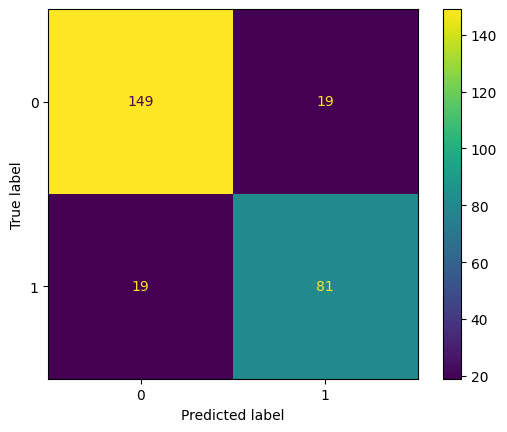

In [ ]:
cm = confusion_matrix(y_teste, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Técnicas de ajuste de hiperparâmetros para Redes Neurais - Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(100, input_shape=(len(df.columns)-1,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               15900     
                                                                 
 dense_4 (Dense)             (None, 8)                 808       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 16,717
Trainable params: 16,717
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',

			# MAE error is good for
			# numerical predictions
			loss='mae',
             metrics=['accuracy'])

In [ ]:
losses = model.fit(x_treino, y_treino,

				validation_data=(x_teste, y_teste),

				# it will use 'batch_size' number
				# of examples per example
				batch_size=50,
				epochs=100, # total epoch

				)

Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 0.4826 - accuracy: 0.6180 - val_loss: 0.4517 - val_accuracy: 0.6381
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4101 - accuracy: 0.6421 - val_loss: 0.3920 - val_accuracy: 0.6567
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3467 - accuracy: 0.6886 - val_loss: 0.3476 - val_accuracy: 0.7164
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2911 - accuracy: 0.7400 - val_loss: 0.3141 - val_accuracy: 0.7500
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.2486 - accuracy: 0.7913 - val_loss: 0.2908 - val_accuracy: 0.7575
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2184 - accuracy: 0.8299 - val_loss: 0.2733 - val_accuracy: 0.7761
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1995 - accuracy: 0.8427 - val_loss: 0.2607 - val_accuracy: 0.7836
Epoch 8/100


In [ ]:
model.evaluate(x_teste, y_teste)

9/9 [==============================] - 0s 3ms/step - loss: 0.1874 - accuracy: 0.8172


[0.18740640580654144, 0.8171641826629639]

In [ ]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
y_pred = (model.predict(x_teste) > 0.5).astype(int)

9/9 [==============================] - 0s 3ms/step


In [ ]:
accuracy_score(y_teste,y_pred)

0.8171641791044776

In [ ]:
loss_df = pd.DataFrame(losses.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.482610,0.617977,0.451697,0.638060
1,0.410059,0.642055,0.391969,0.656716
2,0.346709,0.688604,0.347566,0.716418
3,0.291073,0.739968,0.314147,0.750000
4,0.248560,0.791332,0.290829,0.757463
...,...,...,...,...
95,0.109899,0.894061,0.188821,0.813433
96,0.109416,0.894061,0.188118,0.817164
97,0.109737,0.892456,0.186318,0.813433
98,0.109192,0.894061,0.188511,0.813433


<Axes: >

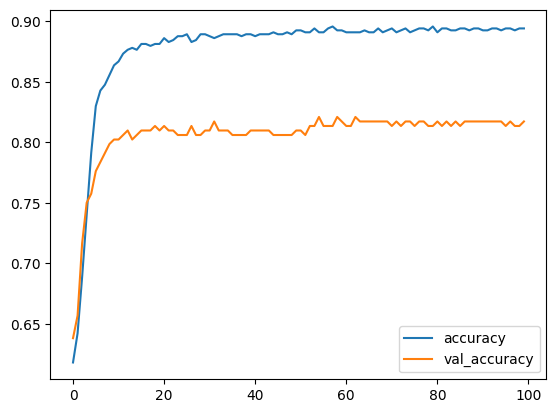

In [ ]:
# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['accuracy','val_accuracy']].plot()

# Técnicas de ajuste de hiperparâmetros para Decision Tree

In [ ]:
tree = DecisionTreeClassifier()

param_grid_DT = {'criterion': ['gini', 'entropy','log_loss'],
              'splitter': ['best','random'],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              }

## GridSearchCV

In [ ]:
g_search = GridSearchCV(estimator = tree, param_grid = param_grid_DT,
                        cv = 10, return_train_score=True)

In [ ]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [ ]:
print(np.unique(y_train_oversampled, return_counts=True))

(array([0, 1]), array([397, 397]))


In [ ]:
g_search.fit(x_train_oversampled, y_train_oversampled);
print(g_search.best_params_)

{'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
print(g_search.cv_results_)

{'mean_fit_time': array([0.01234078, 0.01044159, 0.01190209, 0.0095926 , 0.01085556,
       0.00939503, 0.01123974, 0.00984952, 0.01141195, 0.00990424,
       0.01119113, 0.00953603, 0.01157482, 0.0092515 , 0.01052258,
       0.00555902, 0.00672011, 0.00609522, 0.00625231, 0.00505173,
       0.00592146, 0.00531051, 0.00647283, 0.0054913 , 0.00639863,
       0.00594928, 0.0061049 , 0.00559685, 0.00615981, 0.00543511,
       0.00631518, 0.005461  , 0.00610125, 0.0058342 , 0.00606012,
       0.005353  , 0.00671892, 0.00597663, 0.00741987, 0.00576541,
       0.00698516, 0.00581474, 0.00700364, 0.00546534, 0.00654716,
       0.00581791, 0.00691772, 0.00569246, 0.0067374 , 0.00549507,
       0.00675626, 0.0055012 , 0.00647843, 0.00549092, 0.00742598,
       0.00618324, 0.00736959, 0.00641785, 0.00689545, 0.00591657,
       0.00683265, 0.00620391, 0.00804429, 0.00605803, 0.00684452,
       0.00594742, 0.00697575, 0.00591979, 0.00670857, 0.00623465,
       0.00705614, 0.00555122, 0.00745547, 0


 ## RandomizedSearchCV

In [ ]:
r_search = RandomizedSearchCV(estimator = tree, param_distributions = param_grid_DT,
                        n_iter= 10, cv = 10, return_train_score=True)

In [ ]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [ ]:
print(np.unique(y_train_oversampled, return_counts=True))

(array([0, 1]), array([397, 397]))


In [ ]:
r_search.fit(x_train_oversampled, y_train_oversampled);
print(r_search.best_params_)

{'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'log_loss'}


In [ ]:
print(r_search.best_score_)

0.8238291139240506


# Técnicas de ajuste de hiperparâmetros para Decision Tree sem "Cabin"

In [ ]:
tree = DecisionTreeClassifier()

param_grid_DT = {'criterion': ['gini', 'entropy','log_loss'],
              'splitter': ['best','random'],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              }

## GridSearchCV

In [ ]:
g_search = GridSearchCV(estimator = tree, param_grid = param_grid_DT,
                        cv = 10, return_train_score=True)

In [ ]:
sm = SMOTE()
x_train_oversampled_no_cabin, y_train_oversampled_no_cabin = sm.fit_resample(X_train_no_cabin, y_train_no_cabin)

In [ ]:
print(np.unique(y_train_oversampled_no_cabin, return_counts=True))

(array([0, 1]), array([384, 384]))


In [ ]:
g_search.fit(x_train_oversampled_no_cabin, y_train_oversampled_no_cabin);
print(g_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [ ]:
print(g_search.best_score_)

0.8385509227614489



 ## RandomizedSearchCV

In [ ]:
r_search = RandomizedSearchCV(estimator = tree, param_distributions = param_grid_DT,
                        n_iter= 10, cv = 10, return_train_score=True)

In [ ]:
sm = SMOTE()
x_train_oversampled_no_cabin, y_train_oversampled_no_cabin = sm.fit_resample(X_train_no_cabin, y_train_no_cabin)

In [ ]:
print(np.unique(y_train_oversampled_no_cabin, return_counts=True))

(array([0, 1]), array([384, 384]))


In [ ]:
r_search.fit(x_train_oversampled_no_cabin, y_train_oversampled_no_cabin);
print(r_search.best_params_)

{'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'gini'}


In [ ]:
print(r_search.best_score_)

0.8359876965140123


# Validação Cruzada Knn dados de treino

In [ ]:
array_scores = cross_val_score(knn, X_train_no_cabin, y_train_no_cabin, cv=10, scoring="accuracy")
media_scores = array_scores.sum()/10

media_scores

0.7913722478238607

# Validação Cruzada Knn dados de teste


In [ ]:
array_scores = cross_val_score(knn, X_test_no_cabin, y_test_no_cabin, cv=10, scoring="accuracy")
media_scores = array_scores.sum()/10

media_scores

0.7720797720797721